In [1]:
import pandas as pd
import numpy as np
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" 
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
red_wine = pd.read_csv(red_wine_url, sep=";")
white_wine = pd.read_csv(white_wine_url, sep=";")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.00000

Text(0.5, 1.0, 'Red wine quality distribution')

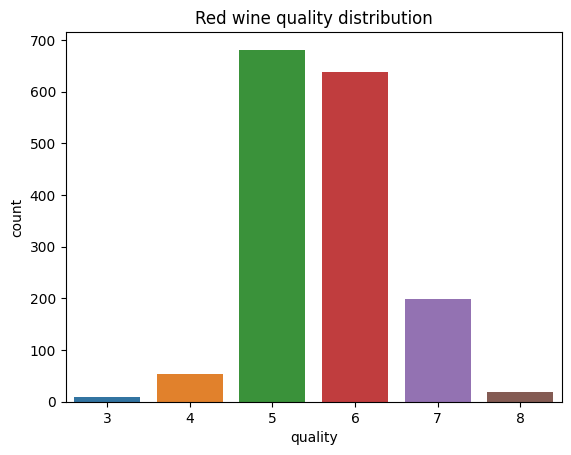

In [6]:
print(red_wine.info()) 
print(white_wine.describe()) 
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="quality", data=red_wine) 
plt.title("Red wine quality distribution")


Text(0.5, 1.0, 'Alcohol vs Density of white wine')

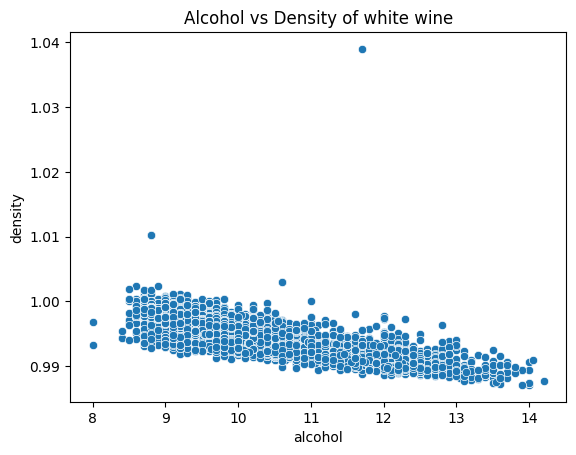

In [4]:
sns.scatterplot(x="alcohol", y="density", data=white_wine)
plt.title("Alcohol vs Density of white wine")

In [8]:
from sklearn.linear_model import LassoCV 
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

# 读取数据文件 
data = pd.read_csv(red_wine_url, sep=";")
# 提取特征变量并进行标准化处理 
X = data.iloc[:, :-1].values 
y=data['quality'].values
X = StandardScaler().fit_transform(X) 
print(X.shape)

# 对特征矩阵进行标准化 
scaler = StandardScaler() 
X = scaler.fit_transform(X) 
# 创建Lasso CV模型 
lasso = LassoCV(cv=3) 
# 对特征矩阵进行特征选择 
selector=SelectFromModel(estimator=lasso)
lasso.fit(X, y) 
X_select=selector.transform(X)
print(X_select.shape)

(1599, 11)
(1599, 9)


<ipython-input-15-f7013c497c5a>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_pca[:,0], X_pca[:,1],c=y,cmap=plt.cm.get_cmap('coolwarm',2))


(1599, 2)
(1599,)


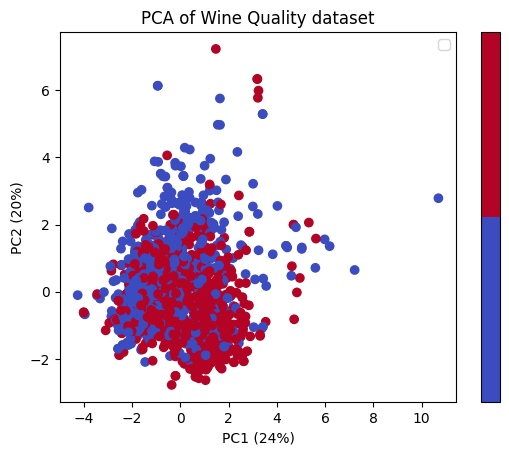

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
# 建立PCA模型并进行降维 
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_select) 
print(X_pca.shape)
print(y.shape)
# 计算主成分方差贡献率 
var_ratio = pca.explained_variance_ratio_ 
# 绘制降维后的散点图 
plt.scatter(X_pca[:,0], X_pca[:,1],c=y,cmap=plt.cm.get_cmap('coolwarm',2))
plt.colorbar(ticks=range(2))
plt.xlabel('PC1 ({}%)'.format(int(var_ratio[0]*100))) 
plt.ylabel('PC2 ({}%)'.format(int(var_ratio[1]*100))) 
plt.title('PCA of Wine Quality dataset') 
plt.legend()
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred
#计算准确率
acc=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
print("Accuracy:",acc)
print("confusion matrix:\n",conf_matrix)


Accuracy: 0.55625
confusion matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  6  0  0]
 [ 0  1 87 39  3  0]
 [ 0  3 42 74 10  3]
 [ 0  0  6 19 17  0]
 [ 0  0  1  3  1  0]]


Feature ranking:
1. feature 10 (0.276026)
2. feature 1 (0.134012)
3. feature 9 (0.131319)
4. feature 6 (0.081409)
5. feature 4 (0.064027)
6. feature 8 (0.059408)
7. feature 3 (0.055397)
8. feature 0 (0.053966)
9. feature 7 (0.048706)
10. feature 2 (0.048604)
11. feature 5 (0.047127)


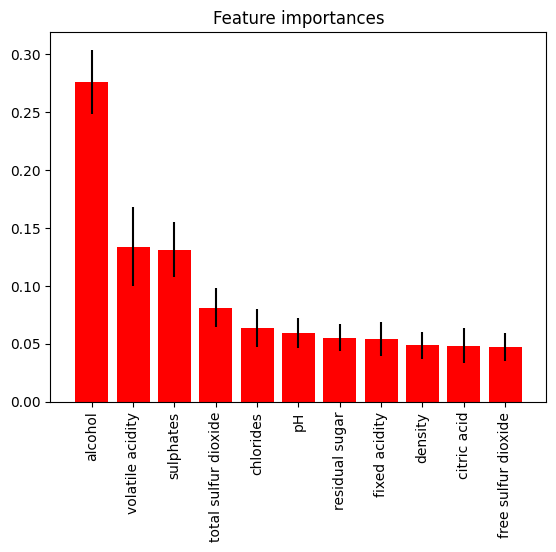

In [20]:
from sklearn.ensemble import RandomForestRegressor 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
 
# 建立随机森林回归模型 
rf = RandomForestRegressor(n_estimators=100) 
rf.fit(X, y) 
# 计算特征重要性 
importances = rf.feature_importances_ 
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0) 
indices = np.argsort(importances)[::-1] 
# 打印特征重要性排名 
print("Feature ranking:")
for f in range(X.shape[1]): 
  print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]])) 
# 绘制特征重要性条形图 
plt.title("Feature importances") 
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center") 
plt.xticks(range(X.shape[1]), data.columns[:-1][indices], rotation=90) 
plt.xlim([-1, X.shape[1]]) 
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
Z=X[:,[1,3,6,8,9,10]]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred
#计算准确率
acc=accuracy_score(y_test,y_pred)
conf_matrix=confusion_matrix(y_test,y_pred)
print("Accuracy:",acc)
print("confusion matrix:\n",conf_matrix)


(1599, 11)
Accuracy: 0.66875
confusion matrix:
 [[  0   0   1   0   0   0]
 [  0   0   6   4   0   0]
 [  0   1 100  27   2   0]
 [  0   0  28  93  11   0]
 [  0   0   0  20  21   1]
 [  0   0   0   0   5   0]]
